# **Part 4 - Feature Engineering**

## Objectives

* Complete the Feature Engineering stage of our ML development workflow for our regression model 

## Inputs

* Train & Test sets for our features and variables
    * Train: 
        * X_train - inputs/datasets/cleaned/X_train.csv
        * y_train - inputs/datasets/cleaned/y_train.csv
    * Test:
        * X_test - inputs/datasets/cleaned/X_test.csv
        * y_test - inputs/datasets/cleaned/X_train.csv

## Outputs

* Generate a list of features to engineer and the chosen transformers selected to be integrated into the model pipeline



---

# Change working directory

* As the notebooks are stored in a subfolder, when running the notebook in the editor, the working directory will need to be adjusted.

The working directory will be changed from its current folder to its parent folder
* access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project5-PredictiveAnalytics-HeritageHousing/jupyter_notebooks'

The parent of the current directory needs to be made the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


* Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Project5-PredictiveAnalytics-HeritageHousing'

---

## Loading Cleaned Data Set

### **Train Set**

In [4]:
import pandas as pd 
X_train = pd.read_csv('./outputs/datasets/clean/X_train.csv')
y_train = pd.read_csv('./outputs/datasets/clean/y_train.csv')

**X_train** - *(Features)*

In [6]:
X_train.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,1222,698.0,4.0,No,0,Unf,570,0.0,487,RFn,...,10192,102.0,143.0,98,6,7,570,0.0,1968,1992
1,1165,0.0,4.0,No,0,Unf,1141,0.0,420,Fin,...,12090,93.0,650.0,123,5,8,1141,144.0,1998,1998
2,698,430.0,2.0,No,0,Unf,698,0.0,528,RFn,...,7500,60.0,0.0,0,4,4,698,0.0,1920,1950
3,1844,0.0,2.0,No,976,GLQ,868,0.0,620,Fin,...,10994,88.0,366.0,44,5,8,1844,0.0,2005,2006
4,1419,0.0,2.0,Av,945,Unf,474,0.0,567,RFn,...,8089,60.0,0.0,0,6,8,1419,0.0,2007,2007
5,1422,1177.0,4.0,No,0,Unf,1393,0.0,779,Fin,...,14774,108.0,165.0,30,5,9,1393,0.0,1999,1999
6,1629,0.0,3.0,Av,1300,GLQ,316,0.0,808,Fin,...,14536,85.0,236.0,252,5,8,1616,0.0,2002,2003
7,954,795.0,5.0,No,0,Unf,795,0.0,440,Unf,...,6204,60.0,0.0,188,5,4,795,0.0,1912,1950
8,2515,0.0,4.0,No,1219,Rec,816,0.0,484,Unf,...,32668,69.0,0.0,0,3,6,2035,0.0,1957,1975
9,993,915.0,4.0,No,0,Unf,967,0.0,431,Fin,...,14191,85.0,0.0,0,5,8,967,0.0,2002,2002


**y_train** - *(Target)*

In [10]:
y_train.head(10)

,SalePrice
0,170000
1,258000
2,68400
3,257000
4,392000
5,333168
6,270000
7,118500
8,200624
9,202900


### **Test Set**

In [8]:
X_test = pd.read_csv('./outputs/datasets/clean/X_test.csv')
y_test = pd.read_csv('./outputs/datasets/clean/y_test.csv')

**X_test** - *(Features)*

In [9]:
X_test.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,1188,0.0,3.0,No,593,Unf,595,0.0,312,Unf,...,26142,69.0,189.0,39,7,5,1188,0.0,1962,1962
1,1153,878.0,3.0,Av,252,ALQ,901,0.0,541,Fin,...,11404,75.0,202.0,84,5,7,1153,0.0,1998,1999
2,1099,0.0,3.0,No,0,Unf,1099,0.0,352,Unf,...,9525,75.0,0.0,0,6,5,1099,0.0,1995,2006
3,1602,0.0,3.0,No,1246,ALQ,356,0.0,529,Fin,...,16635,69.0,126.0,0,7,6,1602,0.0,1977,2000
4,1148,0.0,3.0,No,1148,BLQ,0,0.0,672,Unf,...,7931,70.0,0.0,0,5,5,1148,0.0,1959,1959
5,661,589.0,3.0,No,0,Unf,661,0.0,552,Unf,...,5362,53.0,0.0,0,6,5,661,0.0,1910,2003
6,1166,1129.0,4.0,No,728,GLQ,367,0.0,590,RFn,...,13346,69.0,0.0,40,5,7,1095,0.0,1992,2000
7,1473,0.0,1.0,Gd,1324,GLQ,113,0.0,452,Unf,...,25095,65.0,0.0,48,8,5,1437,0.0,1968,2003
8,1360,0.0,3.0,No,384,ALQ,0,0.0,572,Unf,...,7134,60.0,0.0,50,5,5,384,0.0,1955,1955
9,1686,762.0,4.0,No,1361,GLQ,88,0.0,711,RFn,...,46589,52.0,528.0,76,7,8,1629,0.0,1994,2005


**y_test** - *(Target)*

In [11]:
y_test.head(10)

,SalePrice
0,157900
1,222500
2,144000
3,215000
4,132500
5,139000
6,268000
7,143000
8,130000
9,402000


---

## Data Exploration

We will first carry out the data exploration steps again on our cleaned data set. While we are not expecting too much of a change from our original EDA it is worth exploring to help evaluate if there has been any change in correlation or PPS for the features. This analysis can also help to decide on any potential transformations we are considering as part of this feature engineering stage of the workflow.

First we will generate the profiling reports for our train sets

In [12]:
from ydata_profiling import ProfileReport
cleaned_x_report = ProfileReport(df=X_train, minimal=True)
cleaned_x_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
cleaned_x_report = ProfileReport(df=y_train, minimal=True)
cleaned_x_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Now we will examine the correlation levels and PPS score using the same custom code as in the Data Cleaning notebook

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [16]:
xtrain_corr_pearson, xtrain_corr_spearman, pps_matrix = CalculateCorrAndPPS(X_train)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  506.0  0.047  0.098  0.0  0.0  0.0  0.046  0.609


Again we will display the heatmaps to check correlation & PPS





*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



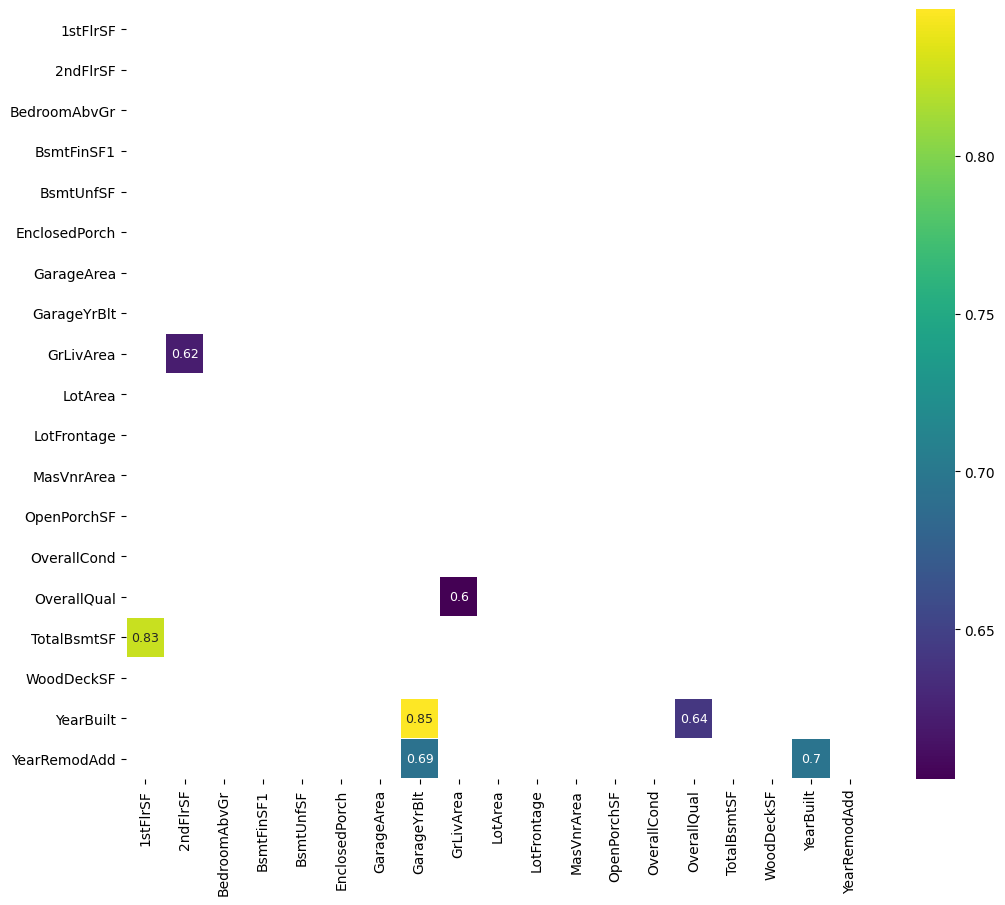



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



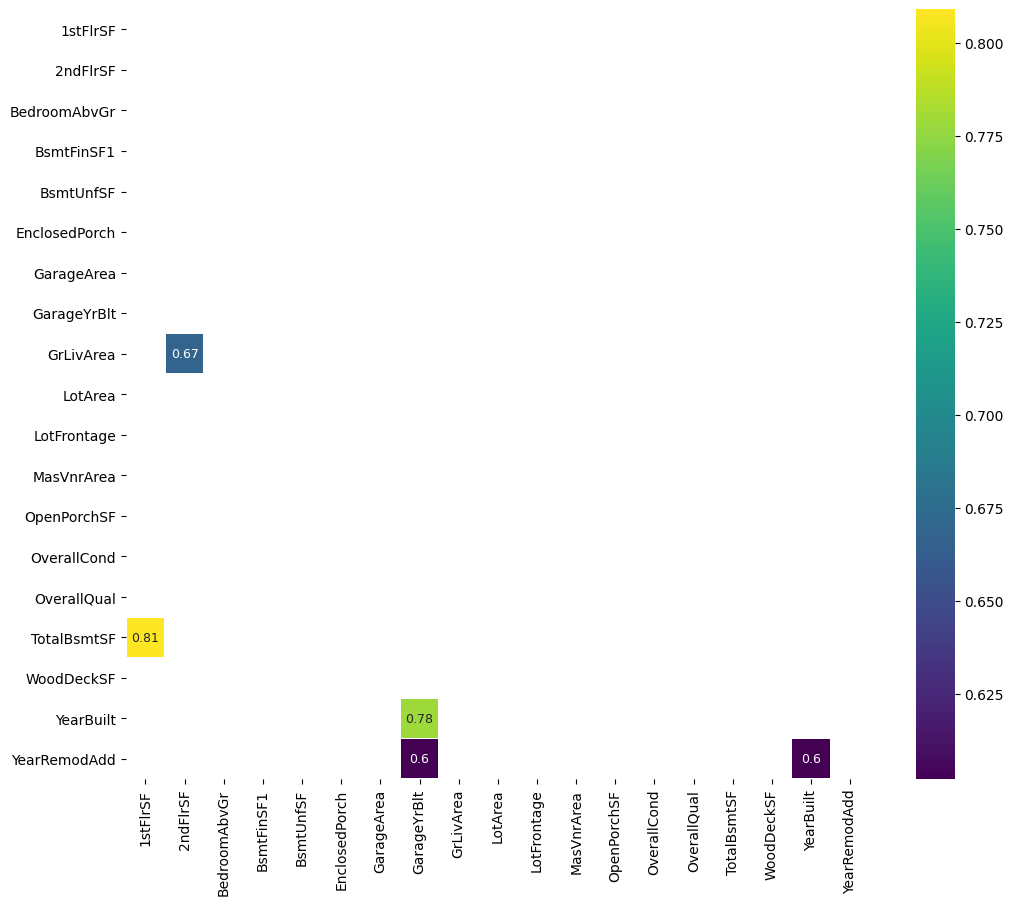



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.



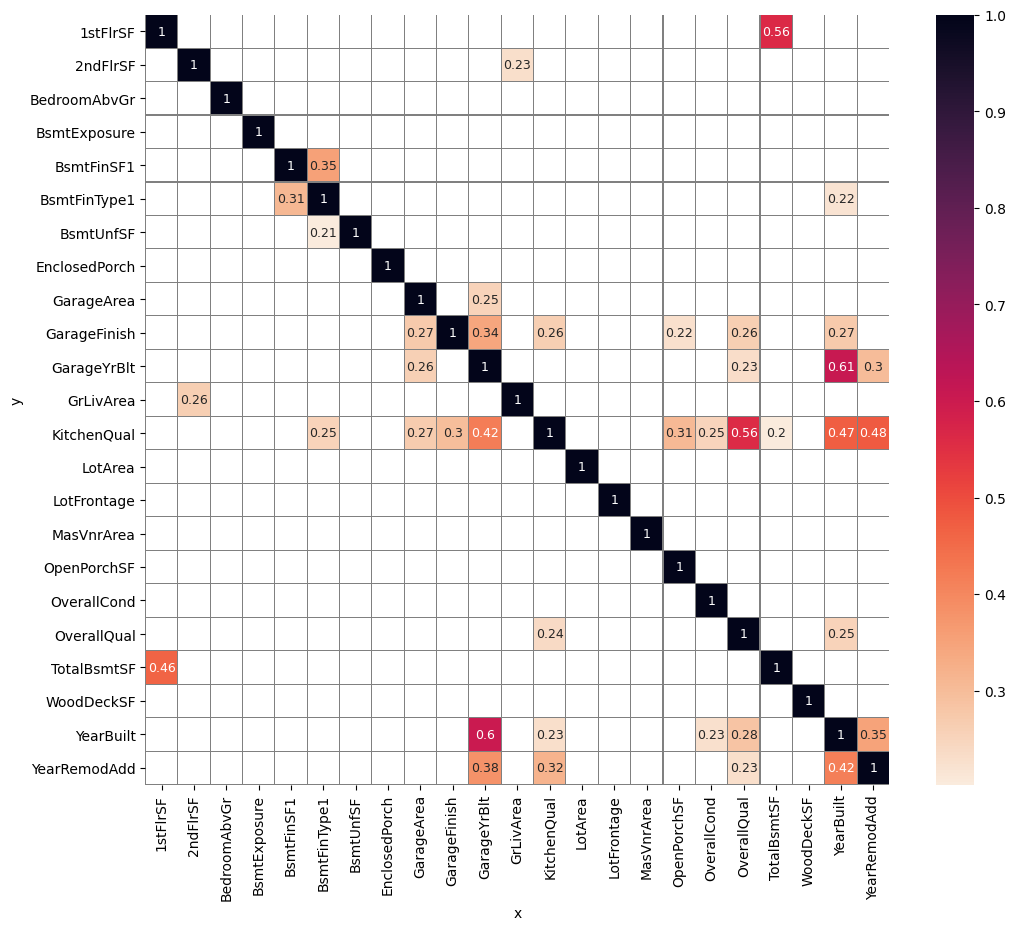

In [19]:
%matplotlib inline
DisplayCorrAndPPS(df_corr_pearson = xtrain_corr_pearson,
                  df_corr_spearman = xtrain_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.5, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=9)

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
